Importing the Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [4]:
print('Number of with mask iamges :', len(with_mask_files))
print('Number of without mask images',len(without_mask_files))

Number of with mask iamges : 3725
Number of without mask images 3828


**Creating Labels for two class of Images**

with mask --> 1

without mask --> 0

In [5]:
#Create the labels
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [6]:
labels  = with_mask_labels + without_mask_labels

**Displaying the images**

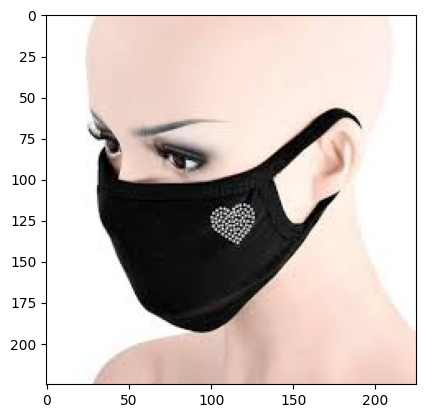

In [7]:
#Displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_2375.jpg')
imgplot = plt.imshow(img)
plt.show()

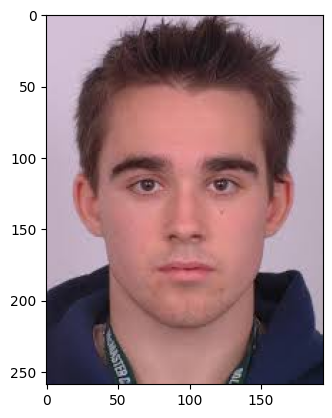

In [8]:
#Displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2375.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Preprocessing**

1. Resize the images

2. Covert images into numpy arrays

In [9]:
#Convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for image_file in with_mask_files:
    image = Image.open(with_mask_path + image_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

without_mask_path = 'data/without_mask/'

for image_file in without_mask_files:
    image = Image.open(without_mask_path + image_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)    

c:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
#Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [11]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


***Train Test Split***

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
#Scaling the data to keep range of values in [0, 1]
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building the Conventional Neural Network**

In [14]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers import conv2D

In [15]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 36s 199ms/step - acc: 0.7162 - loss: 0.5505 - val_acc: 0.8628 - val_loss: 0.3060
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - acc: 0.8882 - loss: 0.2885 - val_acc: 0.9091 - val_loss: 0.2155
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - acc: 0.9052 - loss: 0.2242 - val_acc: 0.8843 - val_loss: 0.2743
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 186ms/step - acc: 0.9263 - loss: 0.1856 - val_acc: 0.9025 - val_loss: 0.2919
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - acc: 0.9385 - loss: 0.1666 - val_acc: 0.9273 - val_loss: 0.2087


**Model Evaluation**

In [18]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.9225 - loss: 0.1721
Test Accuracy 0.9258769154548645


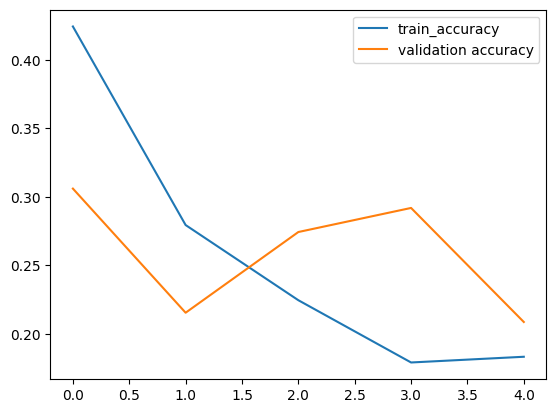

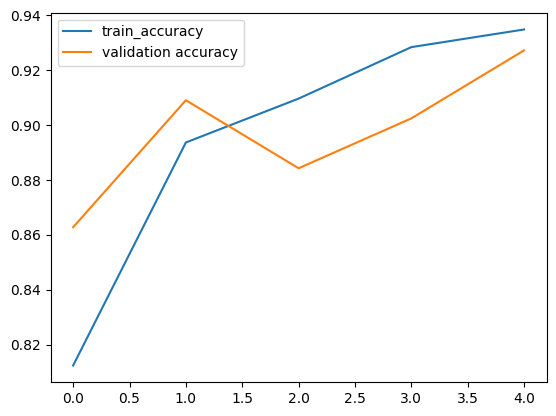

In [19]:
h = history

#Plot the loss value
plt.plot(h.history['loss'], label='train_accuracy')
plt.plot(h.history['val_loss'], label='validation accuracy')
plt.legend()
plt.show()

#Plot the accuracy value
plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.3003261 0.550817 ]]
1


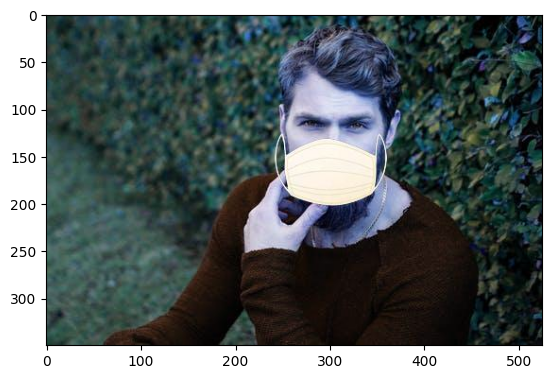

The person in the image is wearing a mask


: 

In [24]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# img = mpimg.imread(input_image_path)
imgplot = plt.imshow(input_image)
plt.show()

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')    